In [9]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys

# Bibliotecas locais
sys.path.insert(0, '../modulos_appynho') # importando modulo

from gerenciamento.importar import acesso as ger
from gerenciamento import minifuncoes as mini
from graficos.perfis import plotagem as plm
from graficos import pizza
from graficos import scatter
from graficos.matriz_confusao import matriz_confusao as confusao

caminho = ger.acesso( {"WIN":"..\\data","LINUX":"../data"} )

caminho_geral = ger.importar_pasta(caminho)

In [19]:
nms = {
    'DEPTH':['DEPTH'],
    'GR':['GR'],
    'DT':['DT'],
    'ILD':['ILD','HDRS','RT','AHT901','AT90','RT90'],
    'CALI':['HCAL','CAL','CALI','DCAL'],
    'NPHI':['NPHI'],
    'RHOB':['RHOB','RHOZ','RHBA4','RHLA','RHLA3','RHBA'],
    'LITO':['Lith_new']
}

nome_poco = '7-MP-28D-BA'

poco = ger.importar_las(caminho_geral[ nome_poco ],nms)

DEPTH = poco['DEPTH']
POCOS = []

for i in poco:
    if i != 'DEPTH':
        POCOS.append(poco[i])

poco

{'DEPTH': array([-4.5720000e-01, -3.0480000e-01, -1.5240000e-01, ...,
         3.5643312e+03,  3.5644836e+03,  3.5646360e+03]),
 'LITO': array([nan, nan, nan, ..., nan, nan, nan]),
 'GR': array([  5.0502,   4.1305,   3.8073, ..., 125.6342, 125.6342, 125.6342]),
 'CALI': array([  nan,   nan,   nan, ..., 3.732, 3.732, 3.732]),
 'ILD': array([   nan,    nan,    nan, ..., 9.6801, 9.6791, 9.6785]),
 'NPHI': array([-0.0517, -0.0541, -0.0101, ...,     nan,     nan,     nan]),
 'RHOB': array([nan, nan, nan, ..., nan, nan, nan]),
 'DT': array([50.    , 50.    , 50.    , ..., 75.4147, 75.4147, 75.4147])}

In [46]:
def cropar_limpo_novo(database, referencia, topo=0, base=20000, nulos=False):            
    
    curvas = []
    for j in database:
        curvas.append(database[j])
        
    profundidade = database[referencia]

    novas_curvas = []
    for j in range(len(curvas)):
        curva = []
        profundiade_cropada = []
        for i in range(len(profundidade)):
            if profundidade[i] >= topo and profundidade[i] < base:
                curva.append(curvas[j][i])
                profundiade_cropada.append(profundidade[i])
        novas_curvas.append(curva)

    a = np.array(novas_curvas).T

    b = a[~np.isnan(a).any(axis=1)]
    if nulos:
        b = b[~np.isin(b,nulos).any(axis=1)]
        
    matriz_final = b.T
        
    dicio_resp = {}
    j = 0
    for chaves in database:
        dicio_resp[chaves] = matriz_final[j]
        j += 1
        

    return dicio_resp

mp = cropar_limpo_novo(poco,'DEPTH')

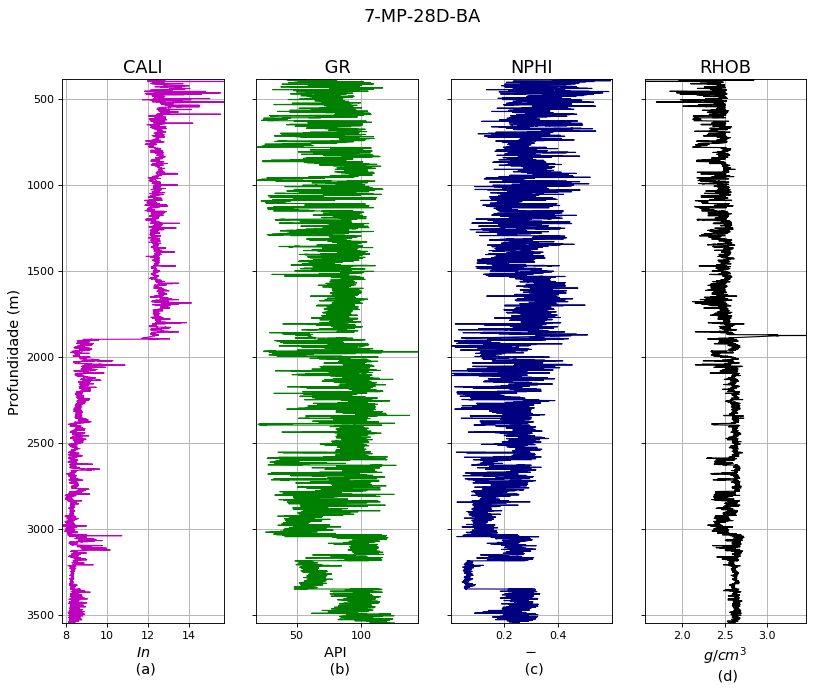

In [55]:
litho_types = pd.read_csv('../data/lito_code.csv')
limites = pd.read_csv(ger.importar_pasta(caminho,'.csv')['limites_formacoes'])

usuario_perfis = {
    'comprimento':12,
    'altura':9,
    'linha_estilo' : '-',
    'titulo_fonte':16,
    'resolucao':80,
    'titulo_geral':nome_poco
}

figura = plm(4,usuario_perfis)
figura.plot_s(0,mp['CALI'],mp['DEPTH'],{'titulo':'CALI','cor':'m','descricao_x':'$In$ \n (a)','descricao_y':'Profundidade (m)'})
figura.plot_s(1,mp['GR']  ,mp['DEPTH'],{'titulo':' GR ','cor':'g','descricao_x':'API \n (b)'})
figura.plot_s(2,mp['NPHI'],mp['DEPTH'],{'titulo':'NPHI','cor':'navy','descricao_x':'$ - $ \n (c)'})
figura.plot_s(3,mp['RHOB'],mp['DEPTH'],{'titulo':'RHOB','cor':'k','descricao_x':'$g/cm^3$ \n (d)'})
#figura.plot_m(8,[RHOB,NPHI],DEPTH,{'titulo':'RHOB','cor_lista':['k','navy'],'descricao_x':'$g/cm^3$ \n (i)'})


## Exemplo teorico da avaliação de relação espacial

coeficiente de correlação = -0.08485281374238567


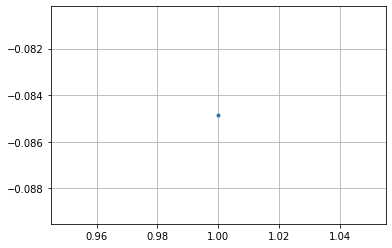

In [63]:
propriedade = [7,2,8,5,4,1,2]
profundidade = [1,2,3,4,5,6,7]

# a) Analisar todos os termos a 1 passo de distância

# dados de propriedade (head,tail)
a1 = (7,2)
a2 = (2,8)
a3 = (8,5)
a4 = (5,4)
a5 = (4,1)
a6 = (1,2)

ap = 1 # distância de todos os elementos (2 - 1, 3 - 2, ... 7 - 6)

# --------------------------------------------------------------------- #

a_heads = [7,2,8,5,4,1]
a_tails = [2,8,5,4,1,2]

print("coeficiente de correlação =",np.corrcoef(a_heads,a_tails)[1][0])

plt.plot(1,np.corrcoef(a_heads,a_tails)[1][0],'.')
plt.grid()
plt.show()

coeficiente de correlação = 0.2676516895156554


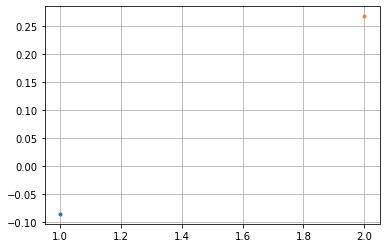

In [62]:
propriedade = [7,2,8,5,4,1,2]
profundidade = [1,2,3,4,5,6,7]

# b) Analisar todos os termos a 2 passos de distância

# dados de propriedade (head,tail)
b1 = (7,8)
b2 = (2,5)
b3 = (8,4)
b4 = (5,1)
b5 = (4,2)

bp = 2 # distância de todos os elementos (3 - 1, 4 - 2, ... 7 - 5)

# --------------------------------------------------------------------- #

b_heads = [7,2,8,5,4]
b_tails = [8,5,4,1,2]

print("coeficiente de correlação =",np.corrcoef(b_heads,b_tails)[1][0])

plt.plot(1,np.corrcoef(a_heads,a_tails)[1][0],'.')
plt.plot(2,np.corrcoef(b_heads,b_tails)[1][0],'.')
plt.grid()
plt.show()

coeficiente de correlação = 0.7514650195518293


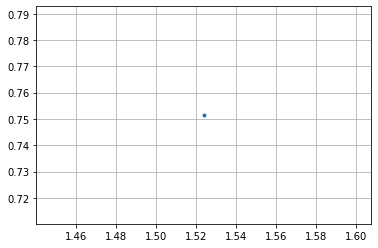

In [64]:
# fazendo para todo o poço agora

passo = 10

valor_h = [] # h  de head ou cabeça
valor_t = [] # t de tail ou cauda

for i in range(len(mp['NPHI'])-passo): # range menor que o passo para evitar o acesso em indices mais altos e não existentes
    valor_h.append(mp['NPHI'][i])
    valor_t.append(mp['NPHI'][i+passo])
    
print("coeficiente de correlação =",np.corrcoef(valor_h,valor_t)[1][0])

plt.plot(mp['DEPTH'][0+passo] - mp['DEPTH'][0],np.corrcoef(valor_h,valor_t)[1][0],'.')
plt.grid()
plt.show()

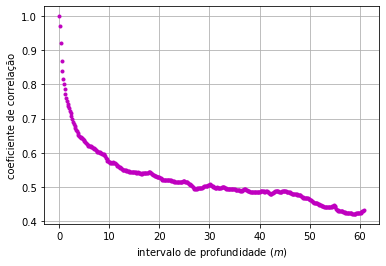

In [53]:
# fazendo para todos os 400 passos (0 a 400)
# janela móvel deve ser de 10 a 20 m
passos = 400

coeficientes_correlação = []
intervalo_profundidade = []

for passo in range(passos): # 'passo' vai de 0 a 300

    # ------------------------------------------ #

    valor_h = [] # h  de head ou cabeça
    valor_t = [] # t de tail ou cauda

    for i in range(len(mp['NPHI'])-passo): # range menor que o passo para evitar o acesso em indices mais altos e não existentes
        valor_t.append(mp['NPHI'][i+passo])
        valor_h.append(mp['NPHI'][i])

    coeficientes_correlação.append(np.corrcoef(valor_h,valor_t)[1][0])
    intervalo_profundidade.append(mp['DEPTH'][0+passo] - mp['DEPTH'][0])

    # ------------------------------------------ #

plt.plot(intervalo_profundidade,coeficientes_correlação,'m.')
plt.xlabel('intervalo de profundidade ($m$)')
plt.ylabel('coeficiente de correlação')
plt.grid()
plt.show()

In [56]:
mp

{'DEPTH': array([ 387.4008,  387.5532,  387.7056, ..., 3548.9388, 3549.0912,
        3549.2436]),
 'LITO': array([57., 57., 57., ..., 57., 57., 57.]),
 'GR': array([ 43.5885,  43.798 ,  38.9639, ..., 125.6342, 125.6342, 125.6342]),
 'CALI': array([12.129 , 12.1411, 12.2255, ...,  8.1614,  8.1539,  8.1463]),
 'ILD': array([ 4.4868,  4.4869,  4.4869, ..., 11.3598, 11.806 , 12.3526]),
 'NPHI': array([0.5983, 0.5529, 0.5542, ..., 0.2374, 0.2363, 0.2351]),
 'RHOB': array([2.8421, 2.8391, 2.8083, ..., 2.5531, 2.5613, 2.567 ]),
 'DT': array([57.7477, 67.4919, 66.5617, ..., 72.3389, 69.6068, 70.4732])}